In [2]:
# 데이터 분석 패키지
import numpy as np
import pandas as pd

In [3]:
# 모든 컬럼을 출력하도록 설정
pd.set_option('display.max_columns', None)  # None으로 설정하면 모든 컬럼 출력
# 모든 행을 출력하도록 설정
pd.set_option('display.max_rows', None)  # None으로 설정하면 모든 행 출력

In [4]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# matplotlib 한글지원 패키지
import koreanize_matplotlib

In [217]:
import random

random.seed(1)

data = { 
  '국어' : random.sample(range(60,100+1),5),
  '수학' : random.sample(range(60,100+1),5),
  '영어' : random.sample(range(60,100+1),5) 
}
data

{'국어': [68, 96, 64, 76, 67],
 '수학': [91, 88, 90, 84, 73],
 '영어': [66, 91, 61, 84, 87]}

In [218]:
df = pd.DataFrame(data=data, index=['홍1','홍2','홍3','홍4','홍5'])
df

,국어,수학,영어
홍1,68,91,66
홍2,96,88,91
홍3,64,90,61
홍4,76,84,84
홍5,67,73,87


In [219]:
df = df.reset_index()
df

,index,국어,수학,영어
0,홍1,68,91,66
1,홍2,96,88,91
2,홍3,64,90,61
3,홍4,76,84,84
4,홍5,67,73,87


In [220]:
df = df.rename(columns={'index':'이름'})
df


,이름,국어,수학,영어
0,홍1,68,91,66
1,홍2,96,88,91
2,홍3,64,90,61
3,홍4,76,84,84
4,홍5,67,73,87


#### wide-from => long-form 변환
- pd.melt의 주요 파라미터
  - id_vars: 식별자로 사용할 열(변환하지 않을 열)
  - value_vars: 값으로 변환할 열(지정하지 않으면 id_vars 외 모든 열)
  - var_name: 변수명을 저장할 열의 이름
  - value_name: 값을 저장할 열의 이름


In [221]:
melted_df = df.melt(id_vars=['이름'],value_vars=['국어','수학','영어'],var_name='과목',value_name='점수')
melted_df

,이름,과목,점수
0,홍1,국어,68
1,홍2,국어,96
2,홍3,국어,64
3,홍4,국어,76
4,홍5,국어,67
5,홍1,수학,91
6,홍2,수학,88
7,홍3,수학,90
8,홍4,수학,84
9,홍5,수학,73


In [222]:
pivoted_df = melted_df.pivot(index='이름',columns='과목',values='점수').reset_index()
pivoted_df.columns.name = ''
pivoted_df

,이름,국어,수학,영어
0,홍1,68,91,66
1,홍2,96,88,91
2,홍3,64,90,61
3,홍4,76,84,84
4,홍5,67,73,87


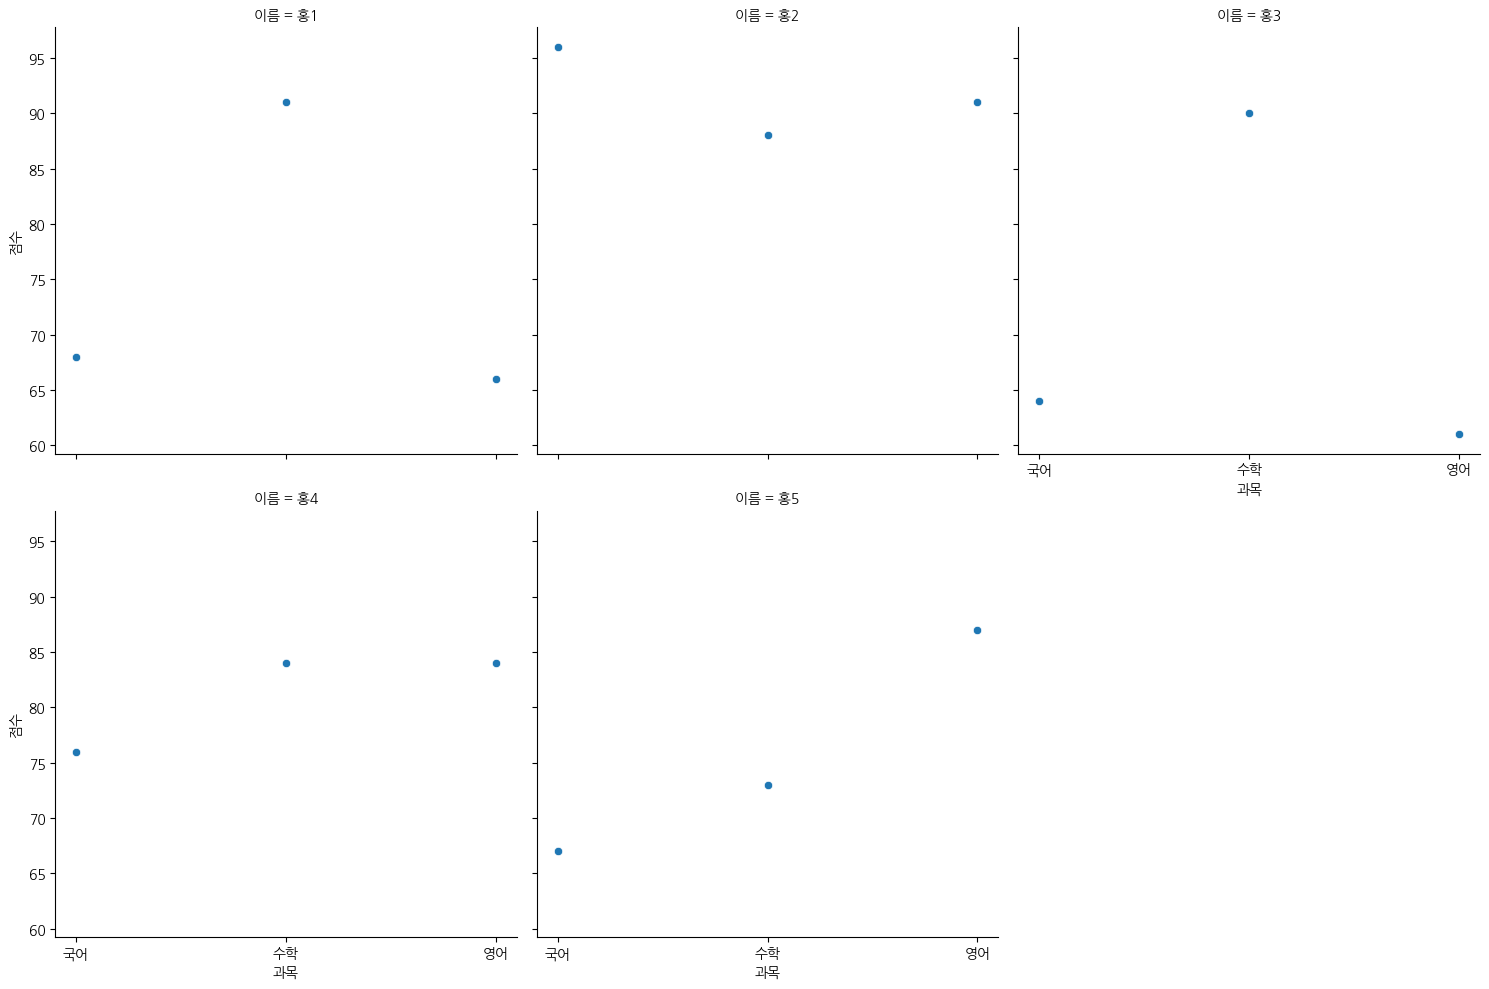

In [12]:
sns.relplot(data=melted_df,x='과목',y='점수',col='이름',col_wrap=3,kind='scatter')

plt.tight_layout()
plt.show()

seaborn.axisgrid.FacetGrid

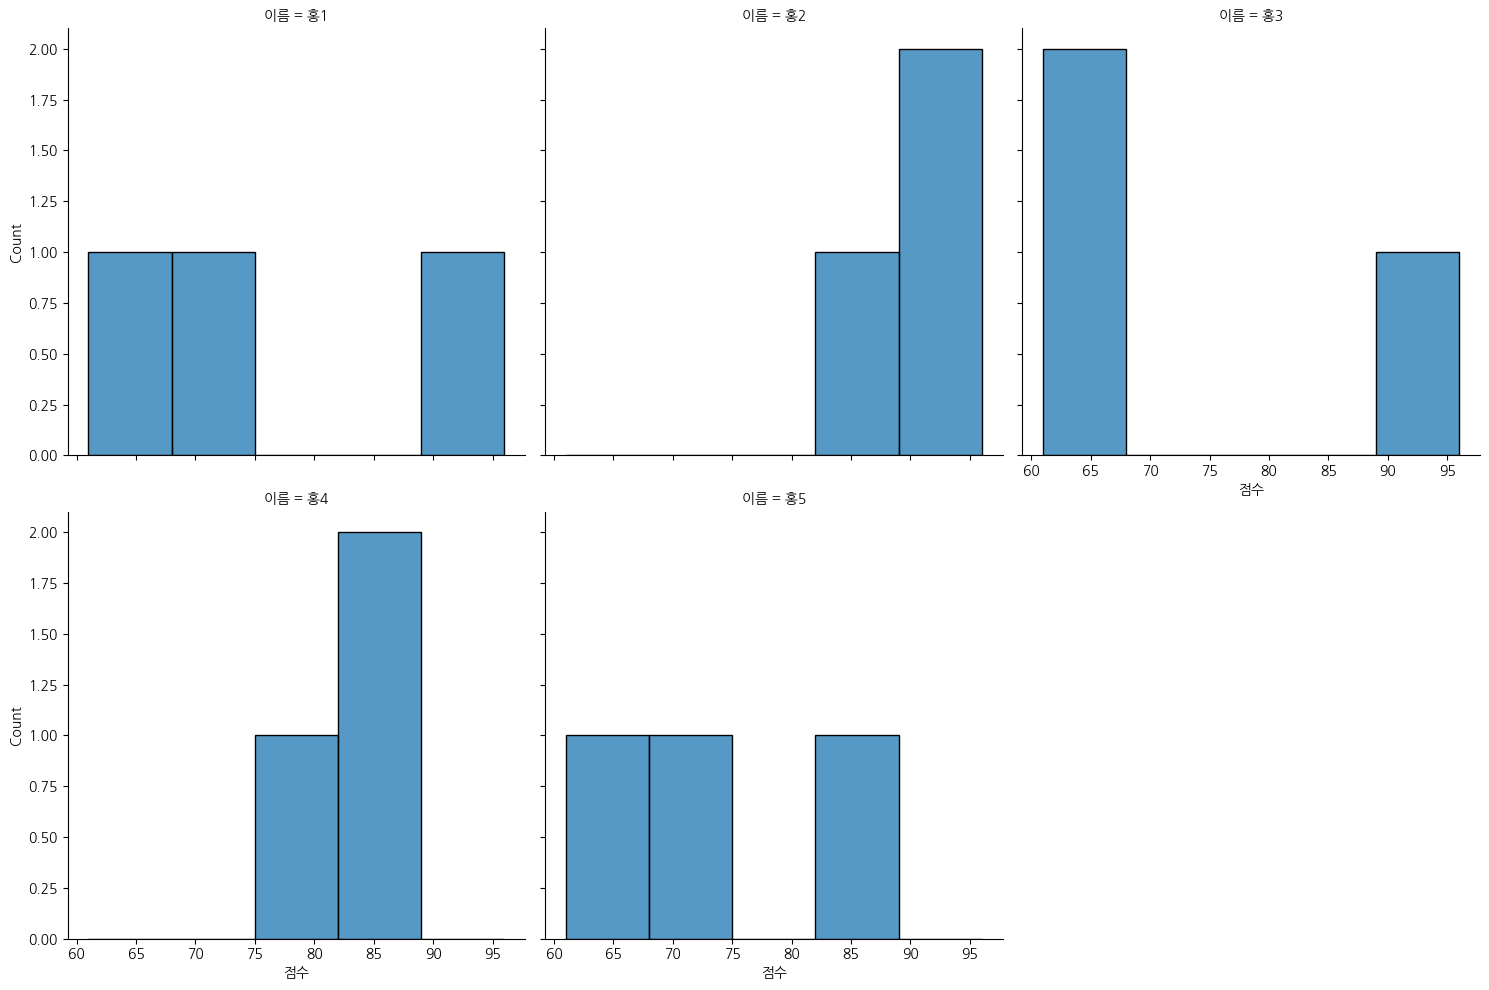

In [13]:
type(sns.displot(data=melted_df,x='점수',col='이름',col_wrap=3))

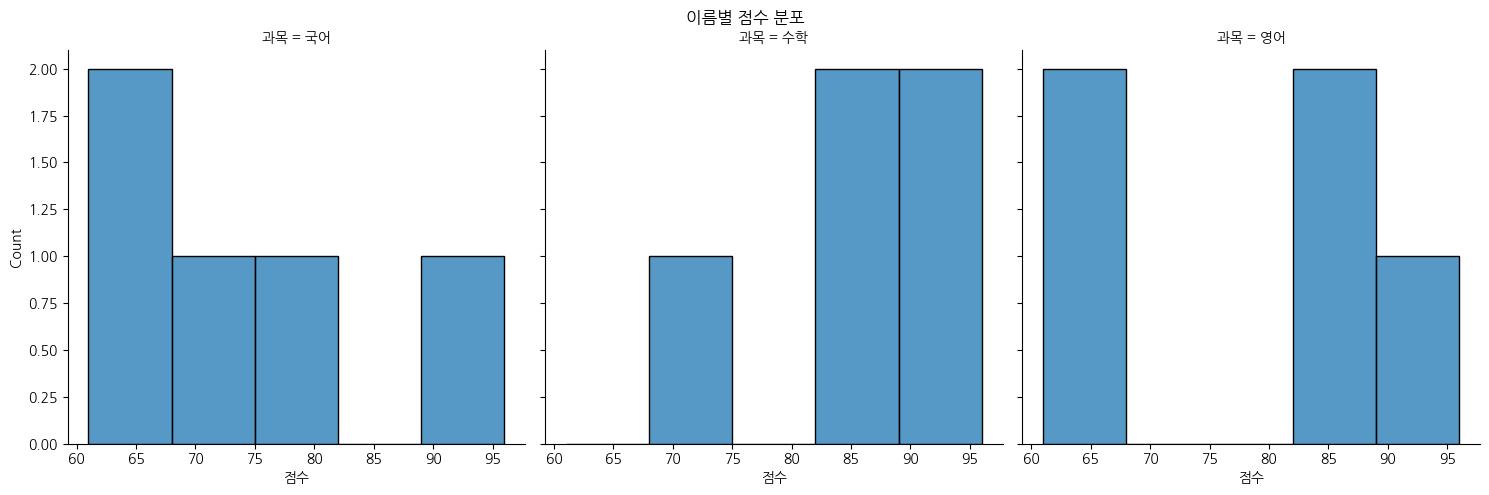

In [26]:
g = sns.displot(data=melted_df,x='점수',col='과목',col_wrap=3)
g.fig.suptitle('이름별 점수 분포')

# top : 0-서브플롯의 상단이 그림의 가장 위쪽에 위치, 1-서브플롯의 상단이 그림의 가장 애래쪽에 위치
plt.subplots_adjust(top=0.9, hspace=0.4) #제목과 서브를롯의 간격 조정
plt.show()

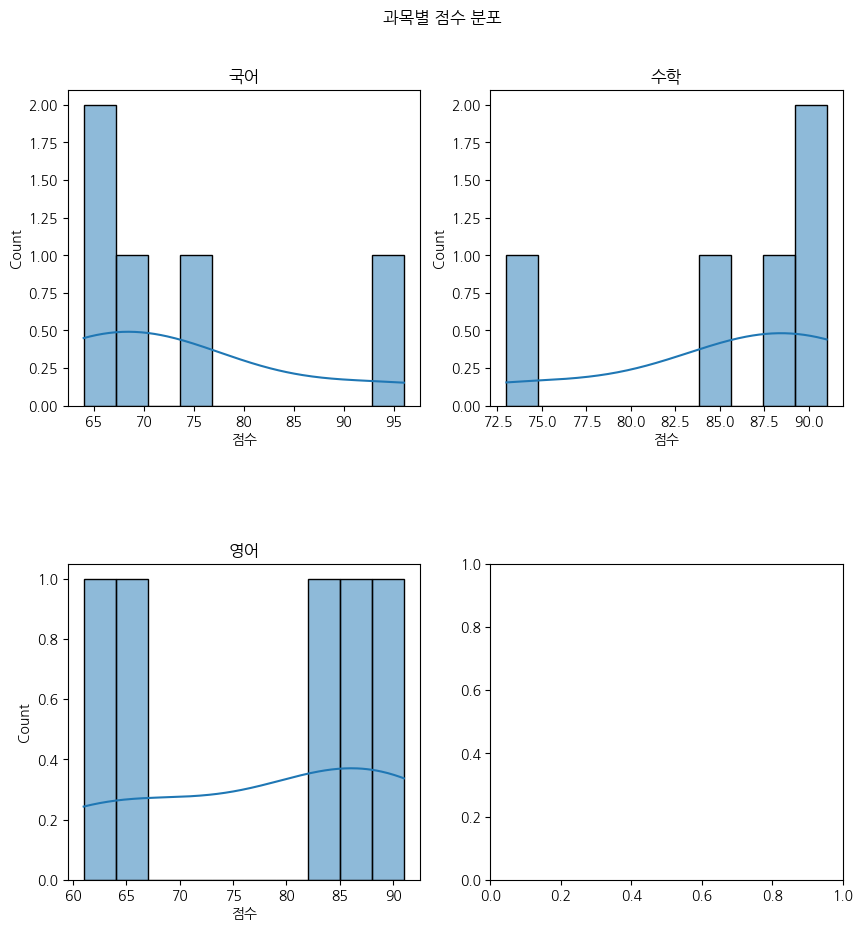

In [64]:
fig, axes = plt.subplots(2,2, figsize=(10,10))
fig.suptitle('과목별 점수 분포')

def ploting(subject,row,col) :
  sns.histplot(data=melted_df.query('과목 == @subject '),x='점수',bins=10, kde=True,ax=axes[row][col])

rows,cols = axes.shape
subjects = melted_df['과목'].unique()
idx = 0
stop = False
for row in range(rows) :
  for col in range(cols) :
    ploting(subjects[idx],row,col)
    axes[row][col].set_title(subjects[idx])
    idx += 1
    if idx == len(subjects):
      stop = True
      break    
  if stop:    
    break
  
# top : 0-서브플롯의 상단이 그림의 가장 위쪽에 위치, 1-서브플롯의 상단이 그림의 가장 애래쪽에 위치
plt.subplots_adjust(top=0.9, hspace=0.5) #제목과 서브를롯의 간격 조정
plt.show()

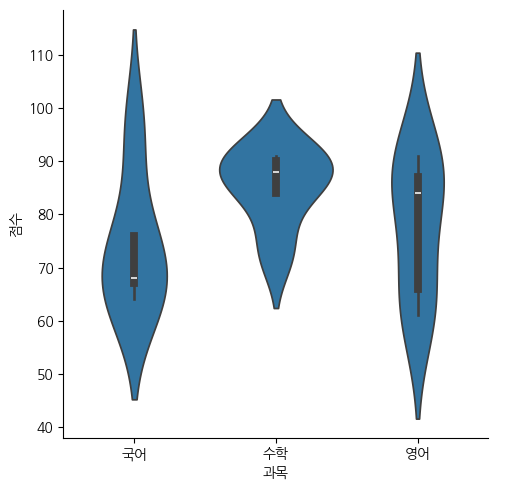

In [81]:
sns.catplot(data=melted_df,x='과목',y='점수', kind='violin')

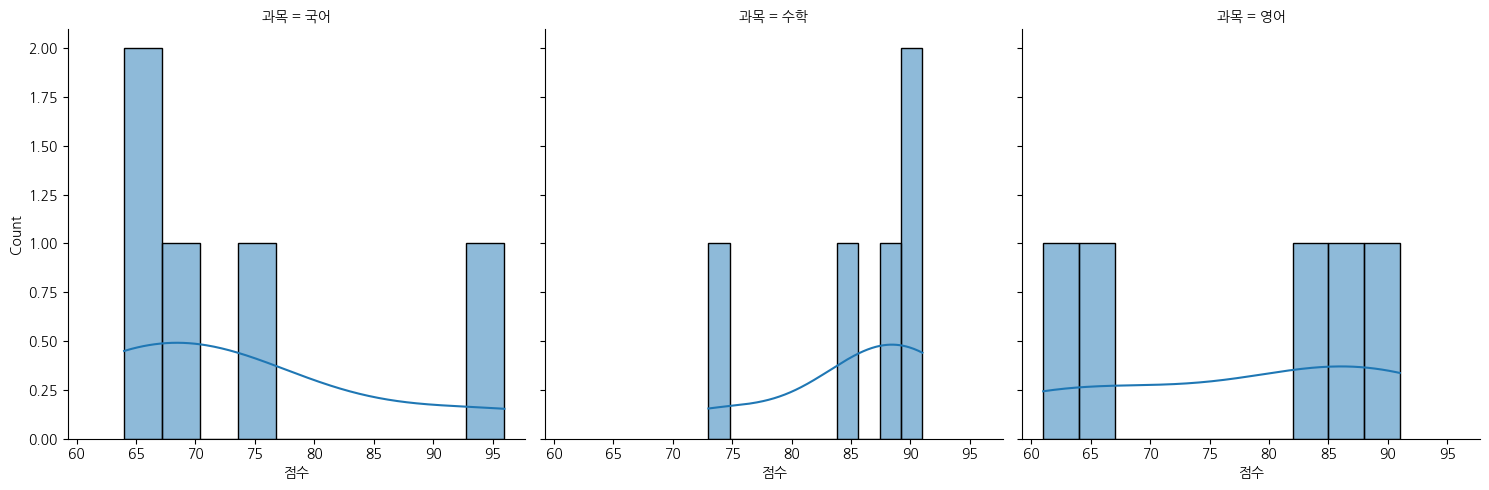

In [103]:
g = sns.FacetGrid(data=melted_df,col='과목',col_wrap=3,height=5)
g.map(sns.histplot, '점수',bins=10,kde=True)
plt.show()

In [109]:
df

,이름,국어,수학,영어
0,홍1,68,91,66
1,홍2,96,88,91
2,홍3,64,90,61
3,홍4,76,84,84
4,홍5,67,73,87


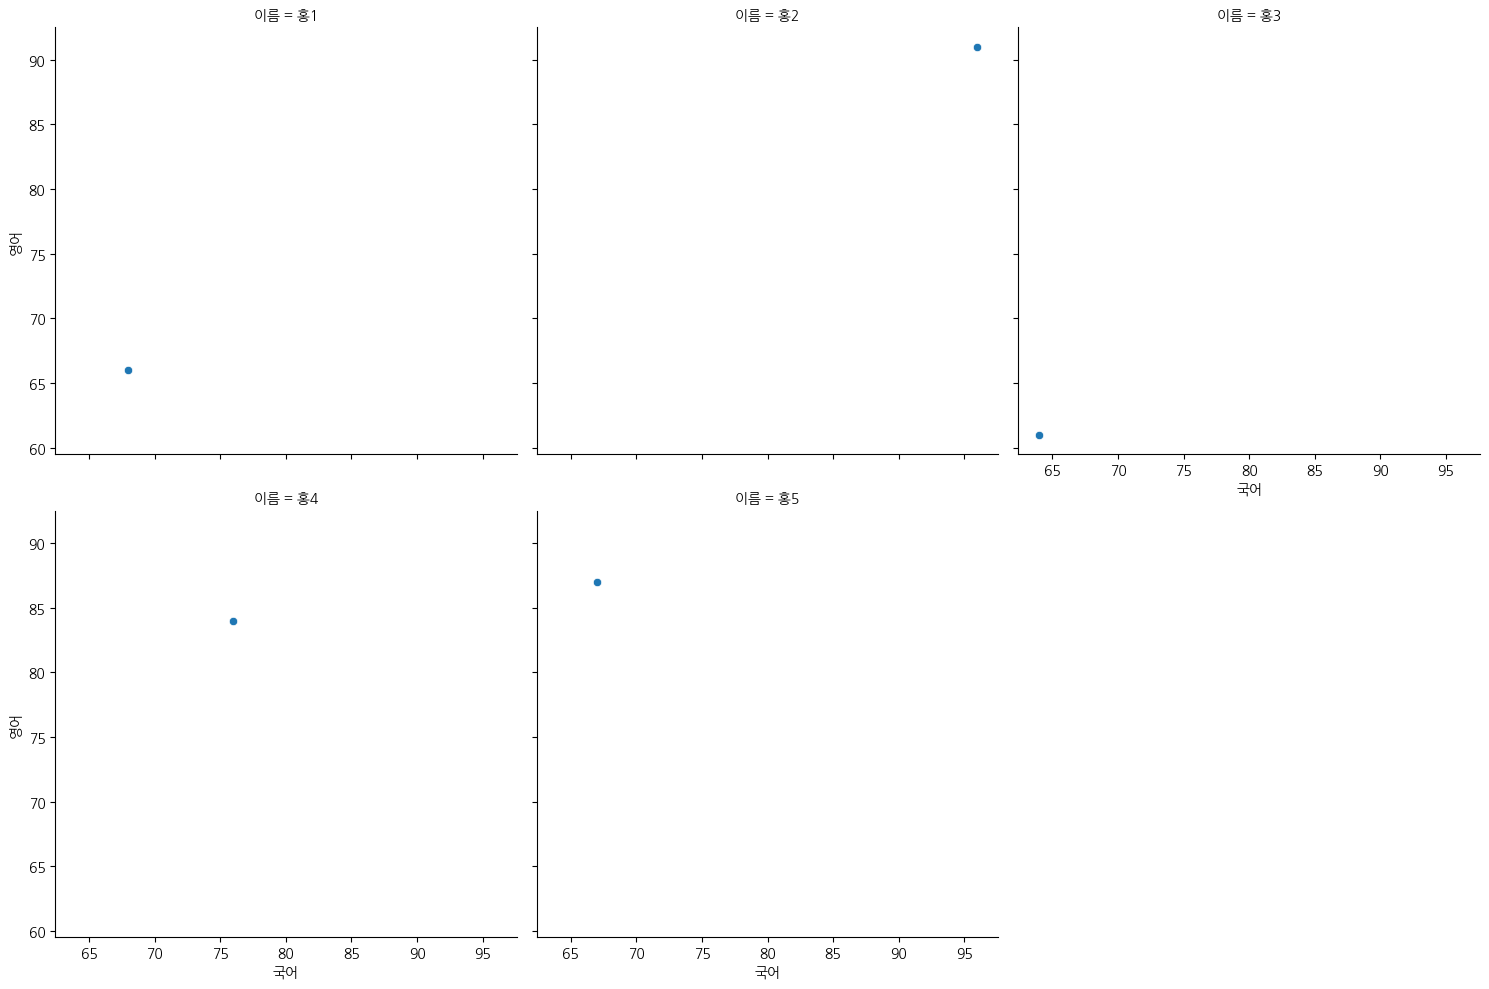

In [ ]:
g = sns.FacetGrid(data=df ,col='이름',col_wrap=3,height=5)
g.map(sns.scatterplot, '국어', '영어')
plt.show()

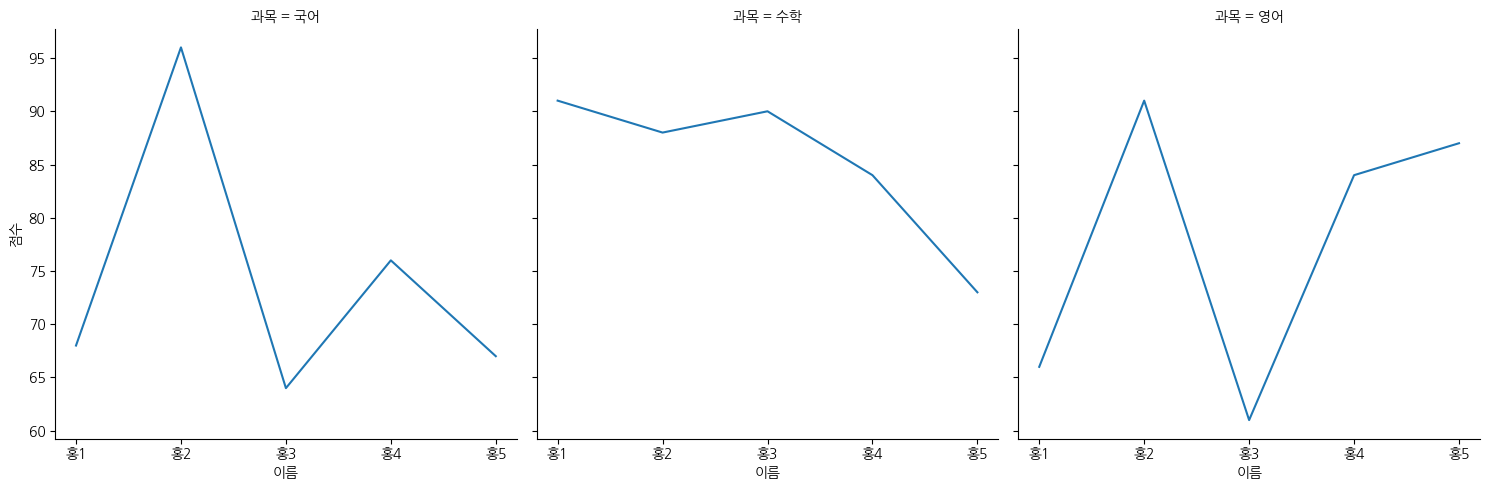

In [120]:
g = sns.FacetGrid(data=melted_df ,col='과목',col_wrap=3,height=5)
g.map(sns.lineplot, '이름','점수')
plt.show()

d:\kdt_2\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


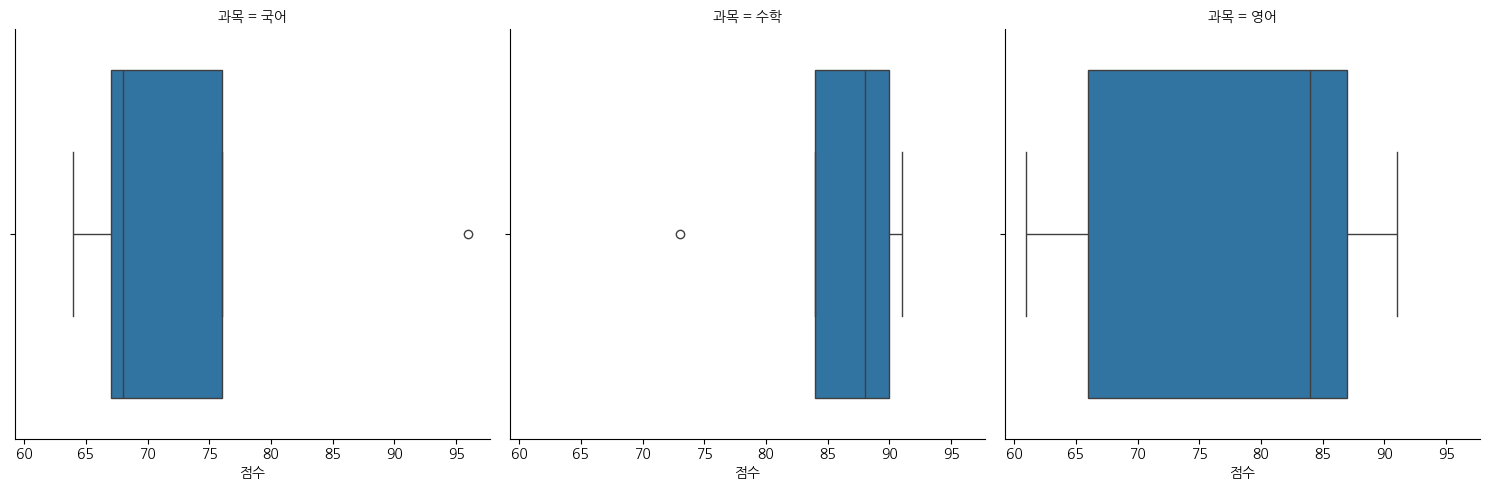

In [270]:
g = sns.FacetGrid(data=melted_df ,col='과목', col_wrap=3, height=5)
g.map(sns.boxplot, '점수')
plt.show()

d:\kdt_2\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


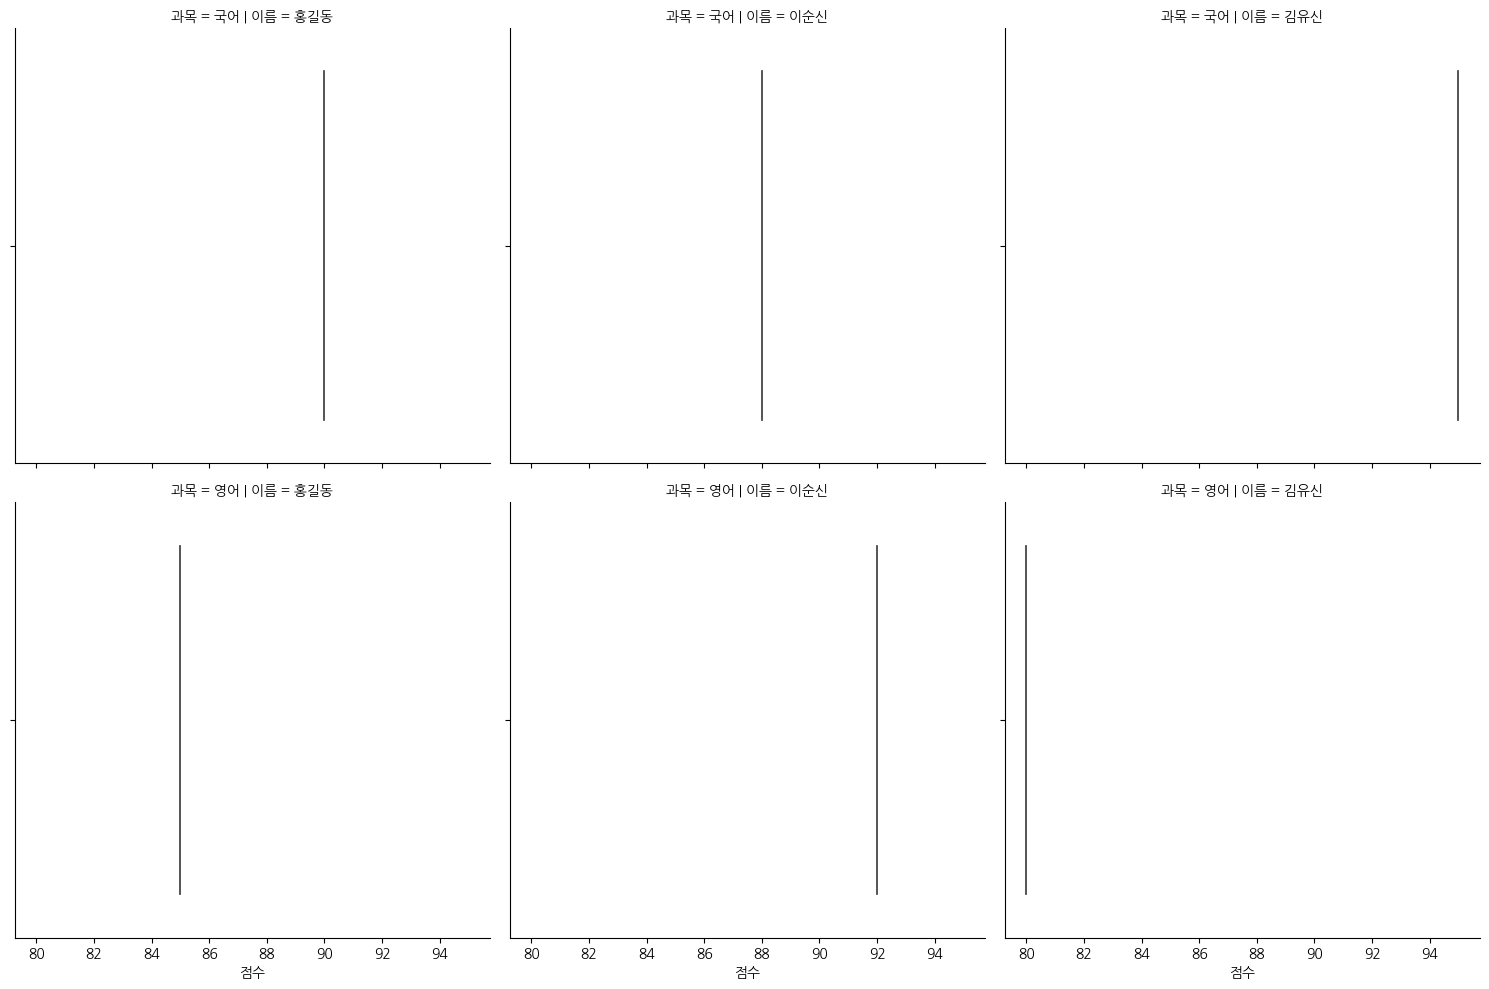

In [198]:
g = sns.FacetGrid(data=melted_df ,col='이름', row='과목', height=5 )
g.map(sns.violinplot, '점수')
plt.show()

d:\kdt_2\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


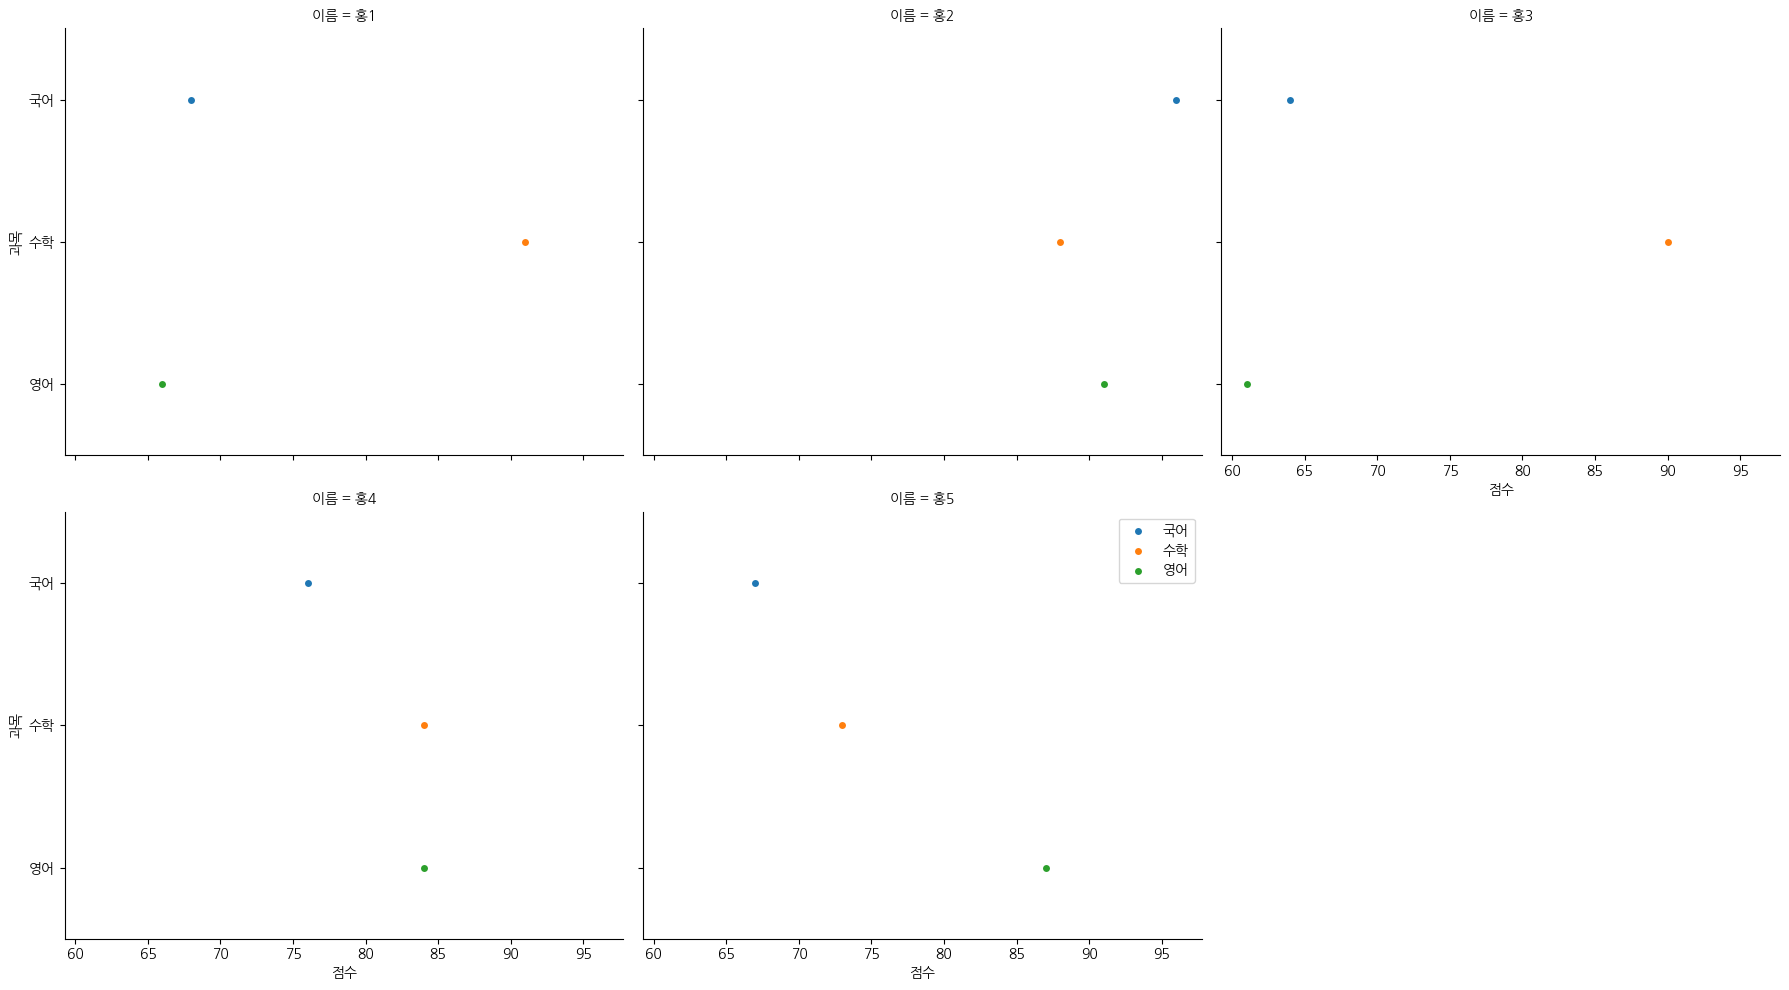

In [264]:
g = sns.FacetGrid(data=melted_df,col='이름', hue='과목', col_wrap=3, height=5, aspect=1.2)
g.map(sns.swarmplot, '점수','과목')
plt.legend()
plt.show()
